# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")




### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# read the data
data = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
The dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

There are three data types - 'Not given', '5', '3', '4' and due to the text field the datatype is determined as Object

In [9]:
#Lets observe the number of Not Given data for rating column
data['rating'].apply(type).value_counts()

rating
<class 'str'>    1898
Name: count, dtype: int64

#### Observations:
There rae 1899 rows as String datatype in rating colum

In [10]:
#replace the Not given rating to Nan
data['rating']=data['rating'].replace(['Not given'],np.nan)

In [11]:
#Change rating datatype to Int
data['rating']= data['rating'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
# Write your code here
data.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [13]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The average time for Food Preperation times are - Min 20 mins, average - 2.737 and Max is 35 minutes. 

### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
#The following statement list out the list of orders that are not rated, which marked as np.nan in prior statement
data['rating'].isna().sum()

736

#### Observations:
There are 736 orders with no rating given

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [15]:
data['order_id'].nunique()  

1898

### Observations on Order Id
There are 1898 unique orders.

#### Customer ID

In [16]:
print(data['customer_id'].nunique());
#Some customers ordered more than once 

1200


### Observation - Customer Id
There are 1200 customers placed orders of 1898 total. Some customers placed more than 1 order. 

#### Restaurant name

In [56]:
print(data['restaurant_name'].nunique())

178


### Observation - Restaurant Names
There are 178 unique restaurants and servered the 1898 orders total. 

### Rating

In [18]:
print(data['rating'].unique());

[nan  5.  3.  4.]


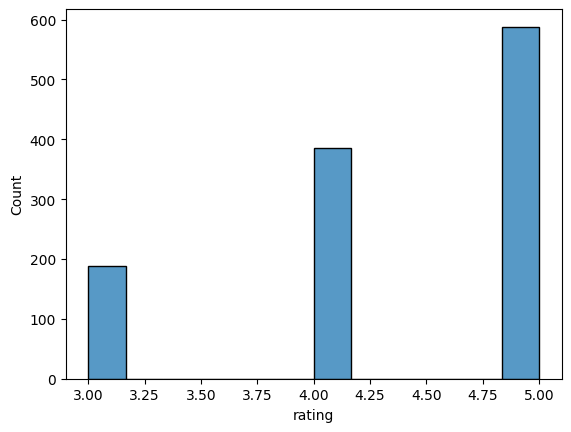

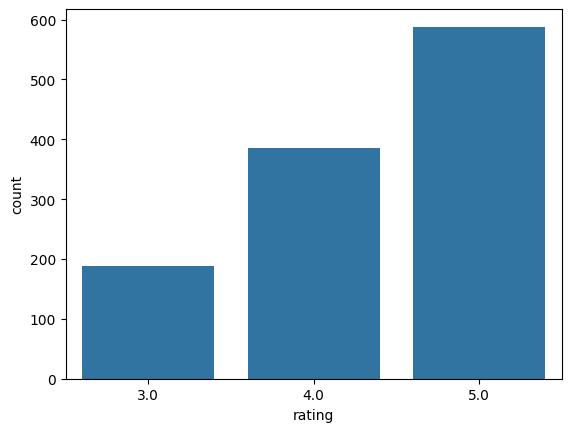

In [19]:
#historgram for rating shows number of ratings count
sns.histplot(data=data, x='rating');
plt.show();
#countplot shows rating count for each number
sns.countplot(data=data, x='rating');
plt.show();

### Cuisine Type

In [20]:
#Unique Cuisine types
data['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

### Observation
There are 14 different cuisine types

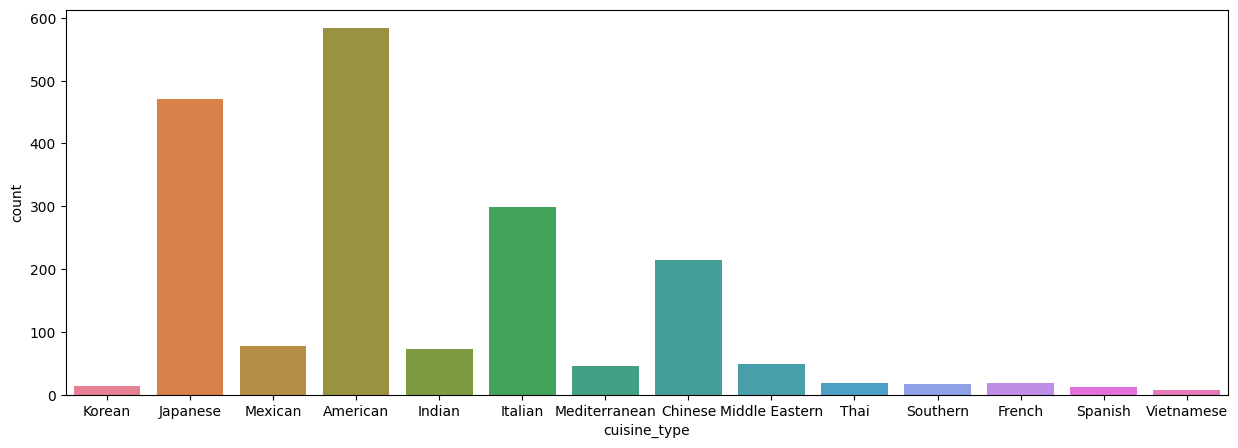

In [21]:
#number of cuisine orders overall
plt.figure(figsize = (15,5));
sns.countplot(data = data, x = 'cuisine_type', hue='cuisine_type');

### Observations on Cuisine Types
* Out of 14 Cuisine Types, American Cuisine have more restaurants than other types this is due to majority of them are Fast Food restaurant chains.
* Japanese and Italian cuisines are next. 

#### Cost of the order

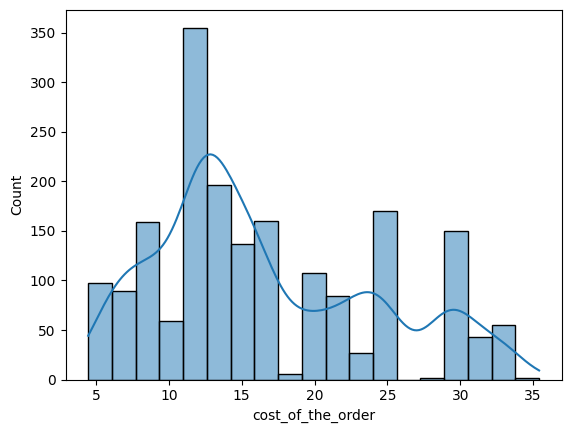

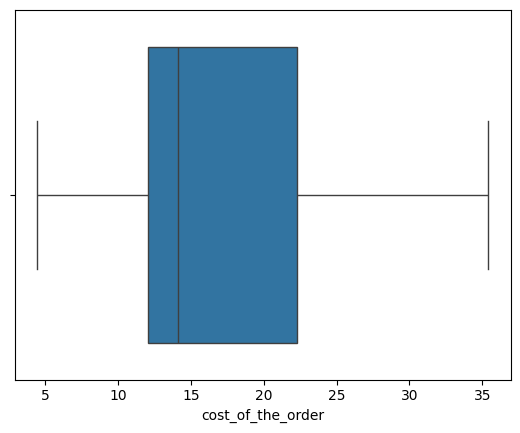

In [22]:
plt.Figure(figsize=(15,5));
sns.histplot(data=data,x='cost_of_the_order',kde=True);
plt.show();
plt.Figure(figsize=(15,5));
sns.boxplot(data=data,x='cost_of_the_order');
plt.show();

#### Day of the week

In [23]:
print(data['day_of_the_week'].unique());
print(data['day_of_the_week'].nunique());

['Weekend' 'Weekday']
2


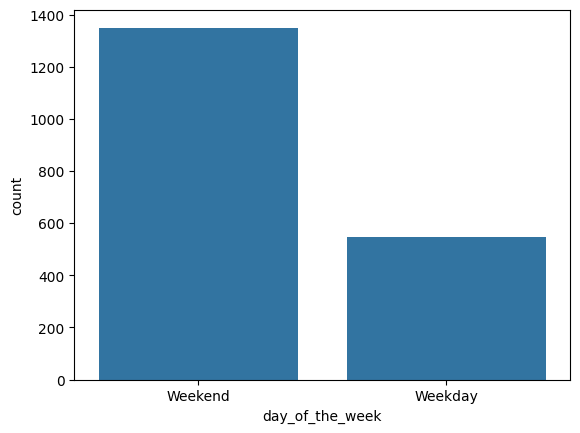

In [24]:
sns.countplot(data=data, x='day_of_the_week');

### Delivery Time

In [25]:
print(data['delivery_time'].unique());

[20 23 28 15 24 21 30 26 22 17 25 16 29 27 18 31 32 19 33]


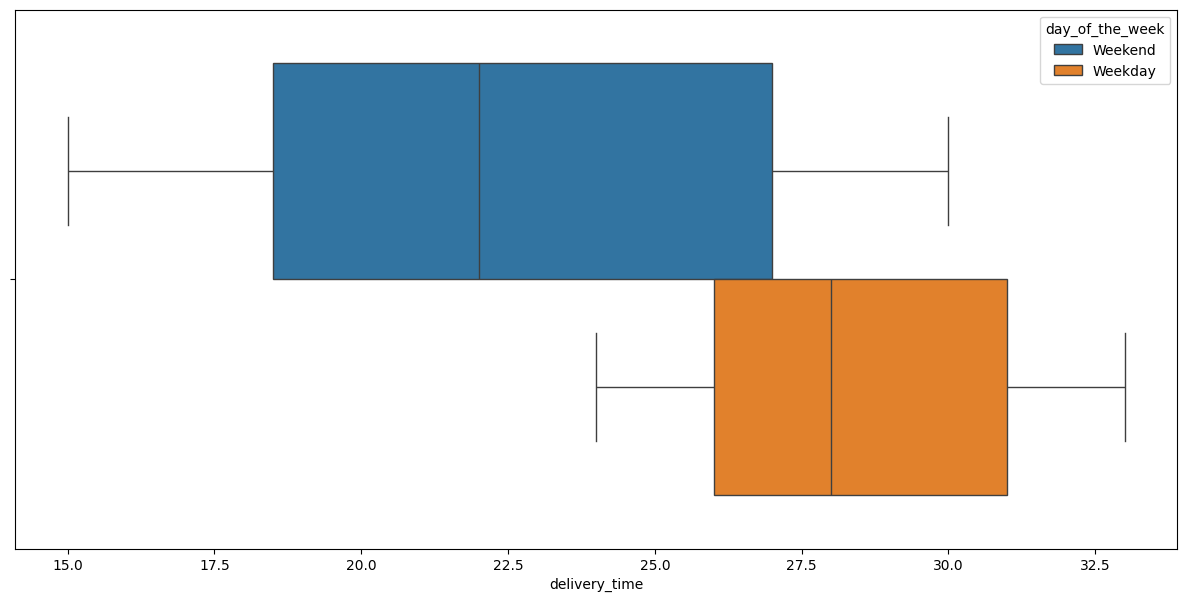

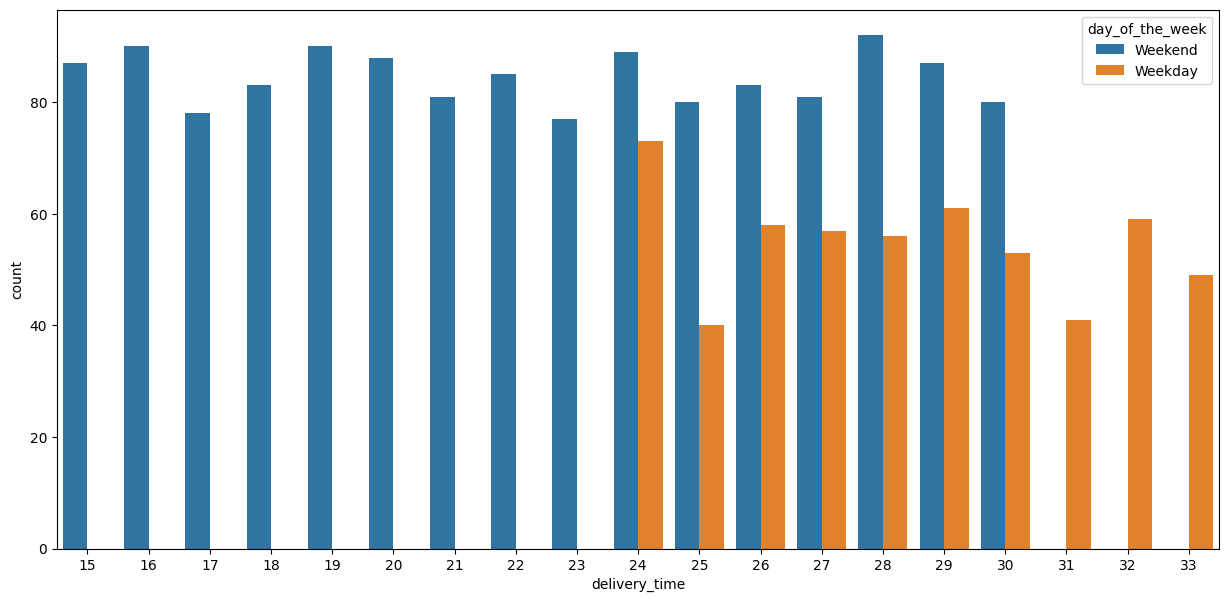

In [26]:

plt.figure(figsize=(15,7));
sns.boxplot(data=data, x='delivery_time',hue='day_of_the_week');
plt.show()
plt.figure(figsize=(15,7));
sns.countplot(data=data, x='delivery_time', hue='day_of_the_week');
plt.show();

### Food Preperation Time

In [27]:
print(data['food_preparation_time'].nunique());

16


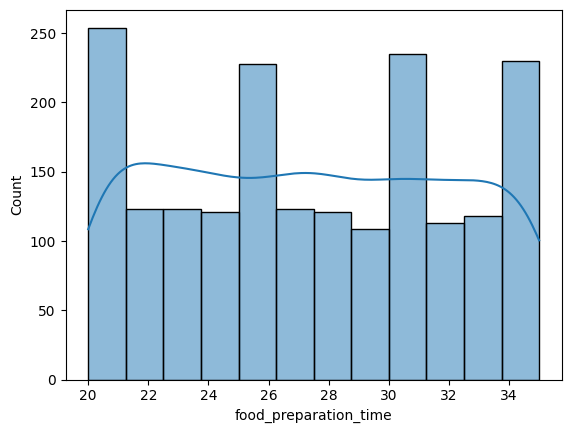

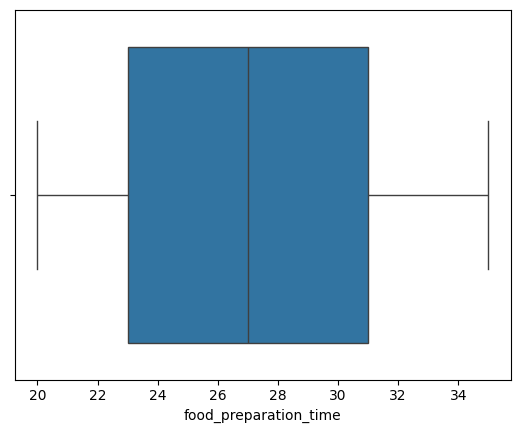

In [28]:
sns.histplot(data=data, x='food_preparation_time', kde=True);
plt.show();
sns.boxplot(data=data, x='food_preparation_time');
plt.show();

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [29]:
#The following are top 5 restaurants number of orders received
data['restaurant_name'].value_counts().head(5)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
The following 5 restaurants have higher number of orders 634 received in total of 1898 orders. The top 5 restaurants contributes to 30% of overall orders. 
* Shake Shack                  219
* The Meatball Shop            132
* Blue Ribbon Sushi            119
* Blue Ribbon Fried Chicken     96
* Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [30]:
# Write the code here
data_wknd = data[data['day_of_the_week'] == 'Weekend']
data_wknd['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
The popular weekend restaurant is American and received 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
# Write the code here
#Filter orders that are over 20 dollars 
data_orders_20_gt = data[data['cost_of_the_order'] > 20]
print('Total number of orders costs greater than 20 is' , data_orders_20_gt.shape[0]);
#Calculate the percentage of orders costs over 20
data_pct = round(data_orders_20_gt.shape[0]/data.shape[0]*100,2);
print('Percentage of orders greater than 20 dollars are ',data_pct, '%');


Total number of orders costs greater than 20 is 555
Percentage of orders greater than 20 dollars are  29.24 %


#### Observations:
Approximately 30% of oerders are greater than 20. There are total of 555 orders greater than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [32]:
# Write the code here
del_time_mean = data[['delivery_time']].mean();
print('The mean order delivery time is', round(del_time_mean,2),'minutes')

The mean order delivery time is delivery_time    24.16
dtype: float64 minutes


#### Observations:
The mean order delivery time is delivery_time    24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
#top3 frequently visited customers and number of visits
top3cust = data['customer_id'].value_counts().head(3)
print('Top3 Frequently visited customers are ',top3cust)


Top3 Frequently visited customers are  customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The top 3 customers are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders.

## Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Day of the week vs Delivery time

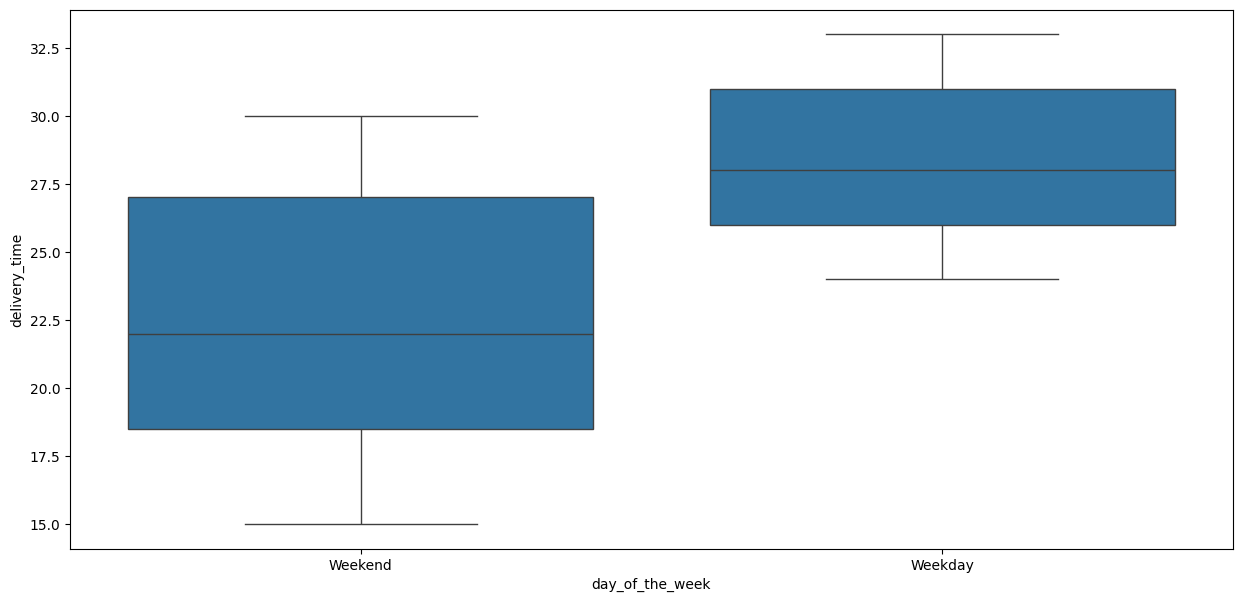

In [34]:
# Write the code here
plt.figure(figsize=(15,7));
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time');
plt.show();

### Observation
Weekday has higher delivery time compared to weekend. Weekend has mean of 22.4 minutes and Weekday has 29 minutes approximately.

### Day of the week vs Food Preperation Time

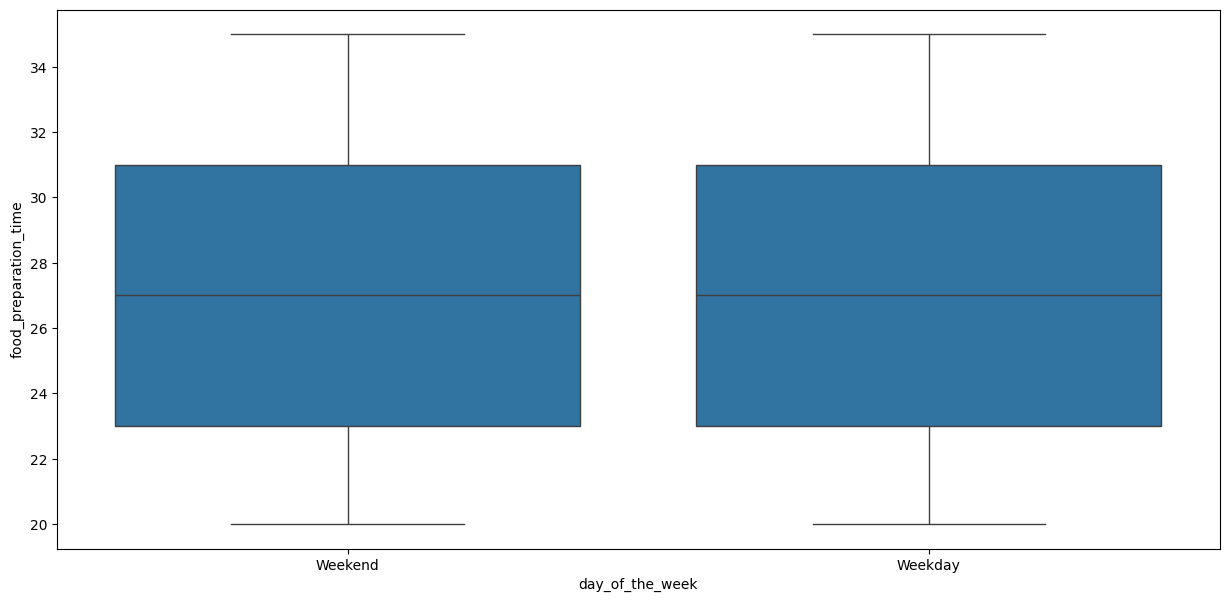

In [35]:
plt.figure(figsize=(15,7));
sns.boxplot(data=data, x='day_of_the_week', y='food_preparation_time');
plt.show();

### Observation
Both Weekday and Weekend have similar Food Preperation Time.

### Day of the week vs Cost of the order

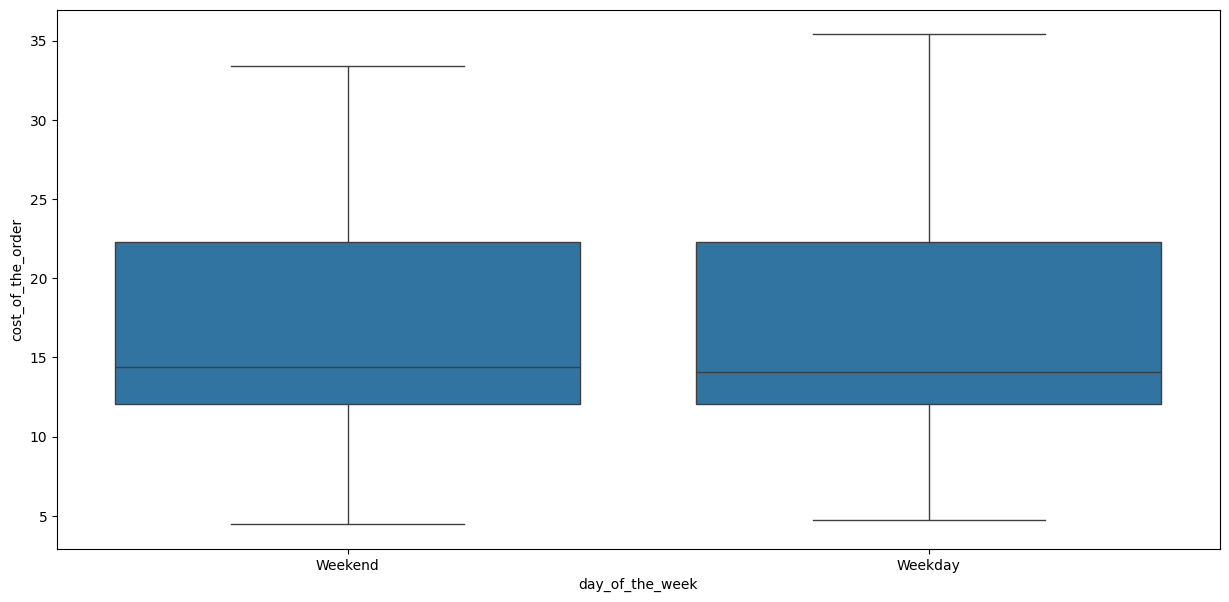

In [36]:
plt.figure(figsize=(15,7));
sns.boxplot(data=data, x='day_of_the_week',y='cost_of_the_order')
plt.show();

### Observation
Both weekday and weekend have same food preperation time. No significant differences found in observation of Food Prep time.

### Cusine vs Cost of the order

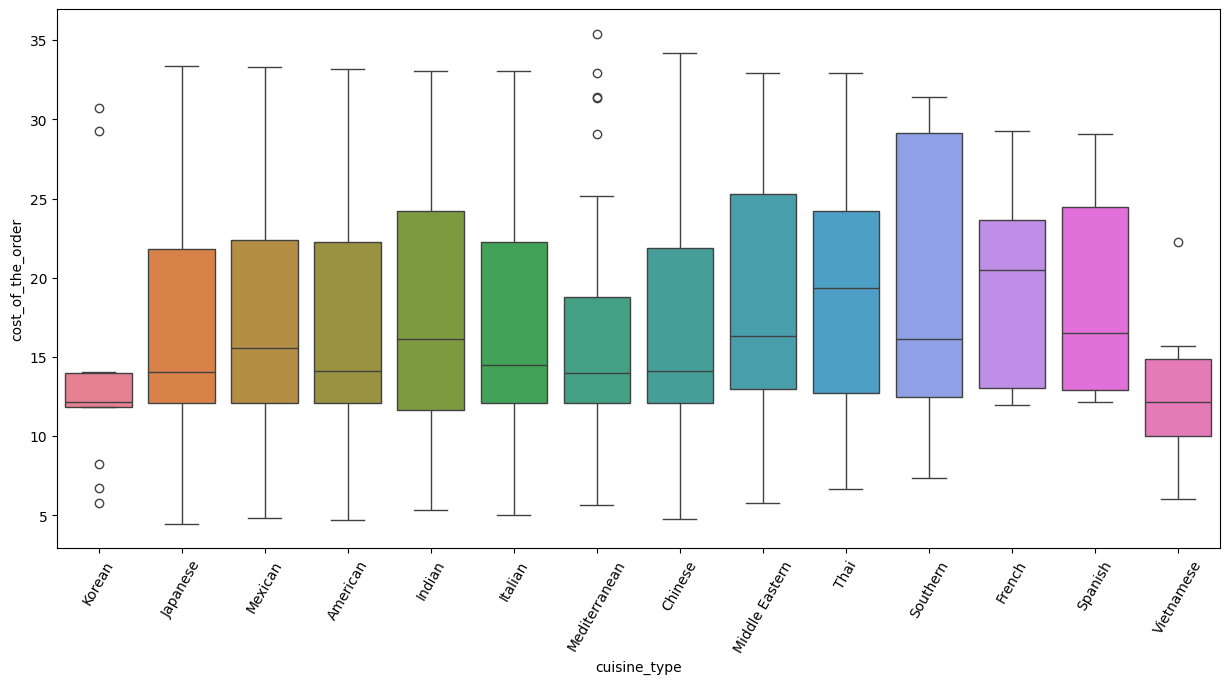

In [37]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7));
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = data, hue='cuisine_type');
plt.xticks(rotation = 60);
plt.show();

### Observation
Southern has higher dollar amount of cost of the orders, Meditarranean has some outliers in high ranges.

### Cuisine vs Food Preperation time

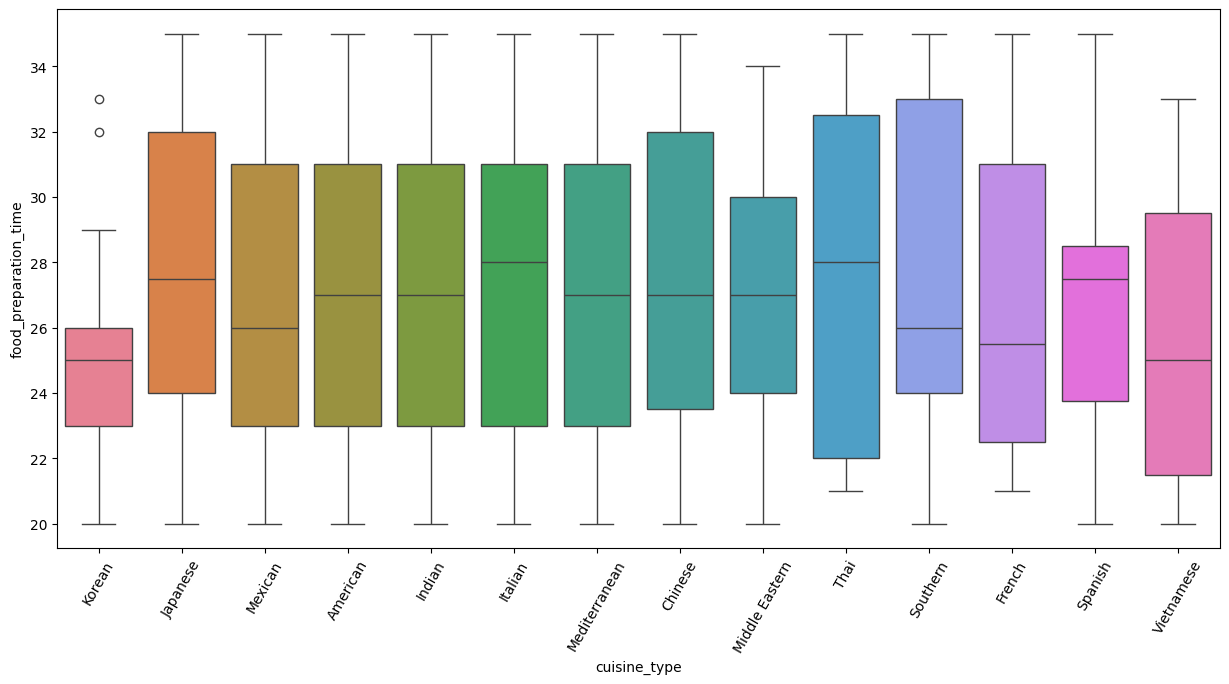

In [38]:
plt.figure(figsize=(15,7));
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = data, hue='cuisine_type');
plt.xticks(rotation = 60);
plt.show();

### Observation
Thai has food preperation time from low to high depends on the menu items. remaining cuisines are ranging from 23-32 minutes. 

In [39]:
data.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

### Cuisine vs Delivery Time

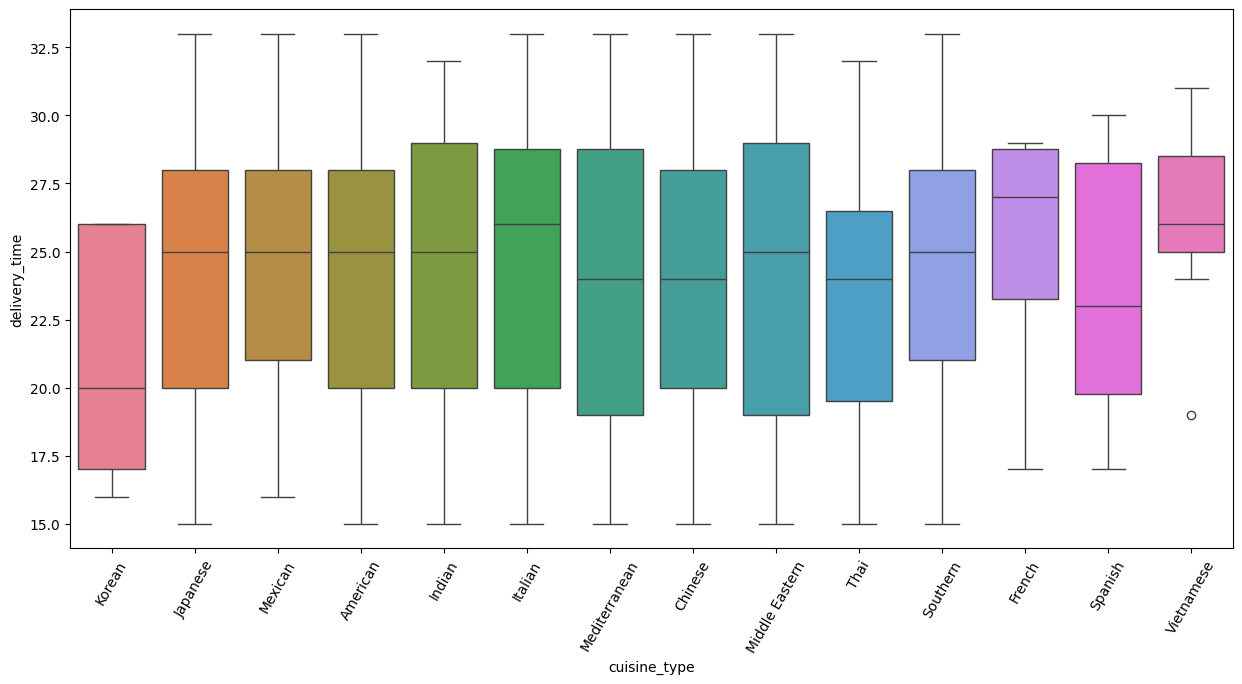

In [40]:
plt.figure(figsize=(15,7));
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = data, hue='cuisine_type');
plt.xticks(rotation = 60);
plt.show();

### Observation 
Korean has faster delivery times, remaining cuisines have mean around 25-28 minutes.

#### Rating vs Delivery time

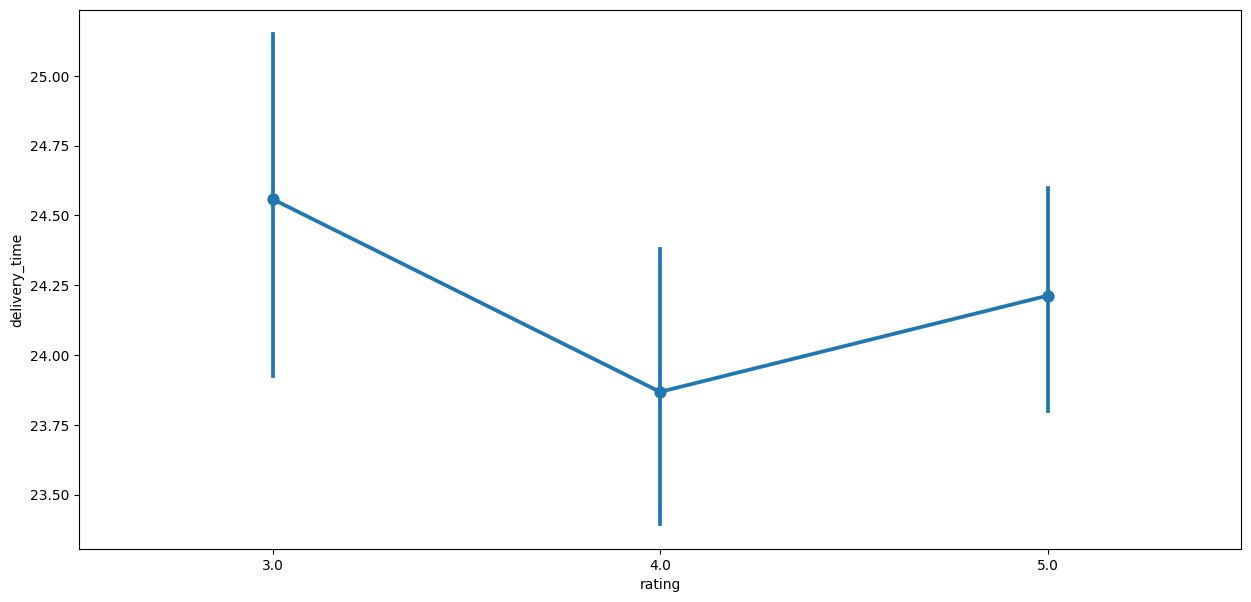

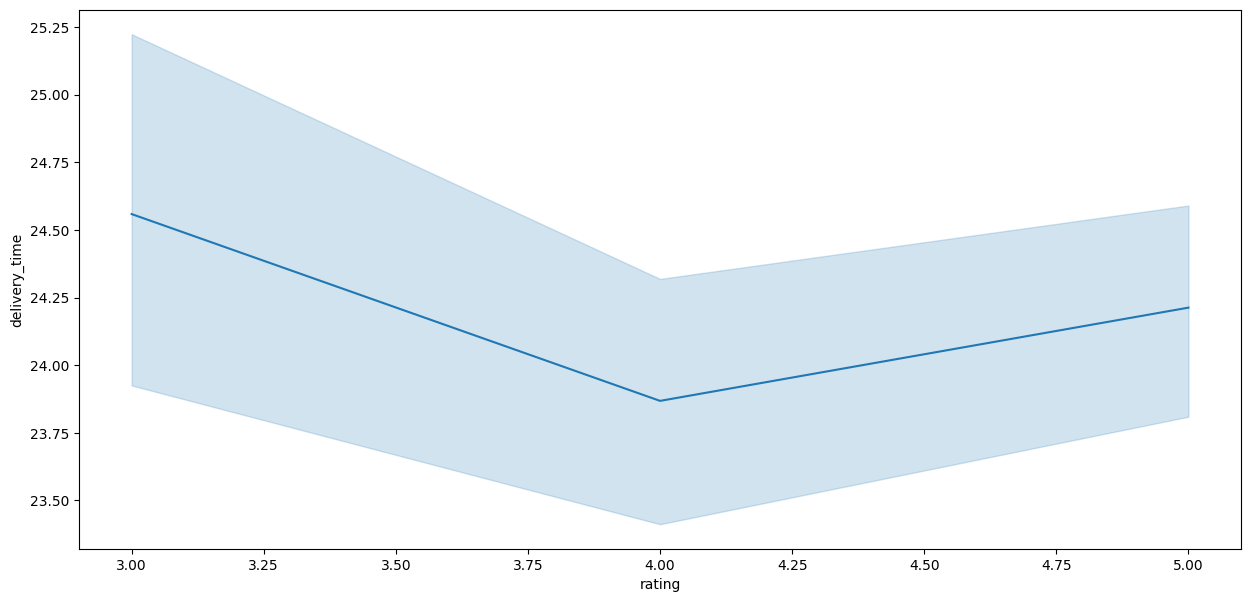

In [41]:
plt.figure(figsize=(15,7));
sns.pointplot(x = "rating", y = "delivery_time", data = data);
plt.show();
plt.figure(figsize=(15,7));
sns.lineplot(x = "rating", y = "delivery_time", data = data);
plt.show();


### Observation between Rating vs Delivery Time
There is a better rating for the orders that have delivery time between 23.25 and 24.5 minutes. The higher delivery time are corresponds to rating. 
* The orders rated 5 star are delivered between 23.45 to 24.5
* The orders rated 4 star are delivered between 23.25 to 24.5
* The orders rated 3 star are delivered between 23.75 to 25.25

### Rating vs Food Preparation Time

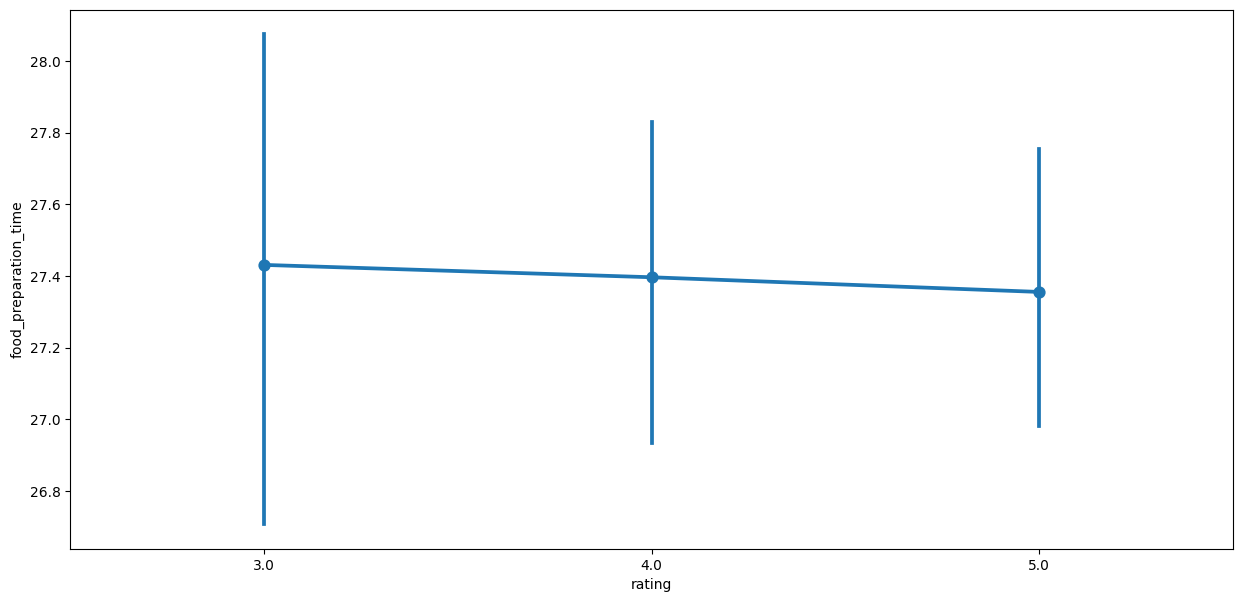

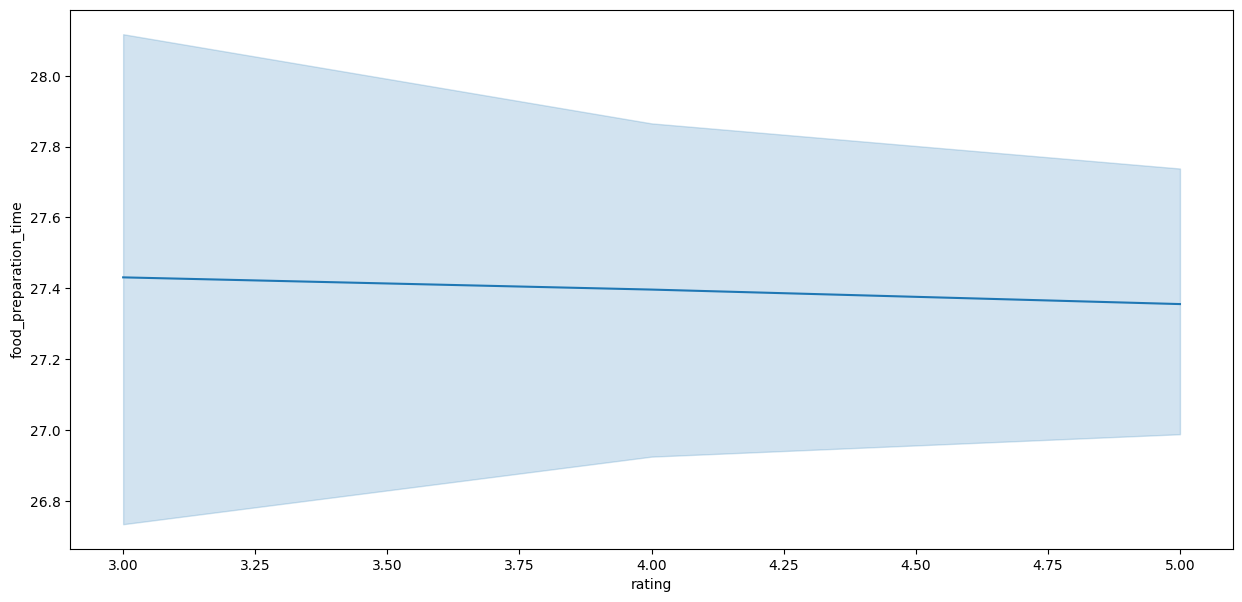

In [42]:
plt.figure(figsize=(15,7));
sns.pointplot(x = "rating", y = "food_preparation_time", data = data);
plt.show();
plt.figure(figsize=(15,7));
sns.lineplot(x = "rating", y = "food_preparation_time", data = data);
plt.show();

### Observations
The food preperation time is with in the optimal range between 26.5-28 are receiving better rating.

#### Rating vs Cost of the order

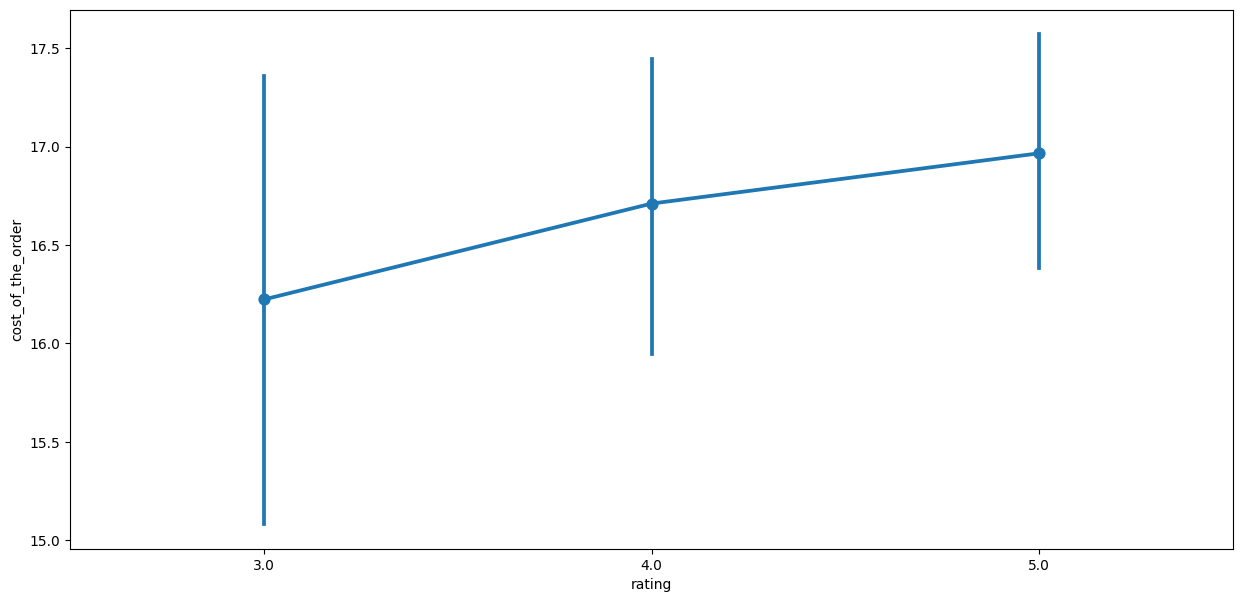

In [43]:
plt.figure(figsize=(15,7));
sns.pointplot(x = "rating", y = "cost_of_the_order", data = data);
plt.show();

### Rating vs Cuisine Type

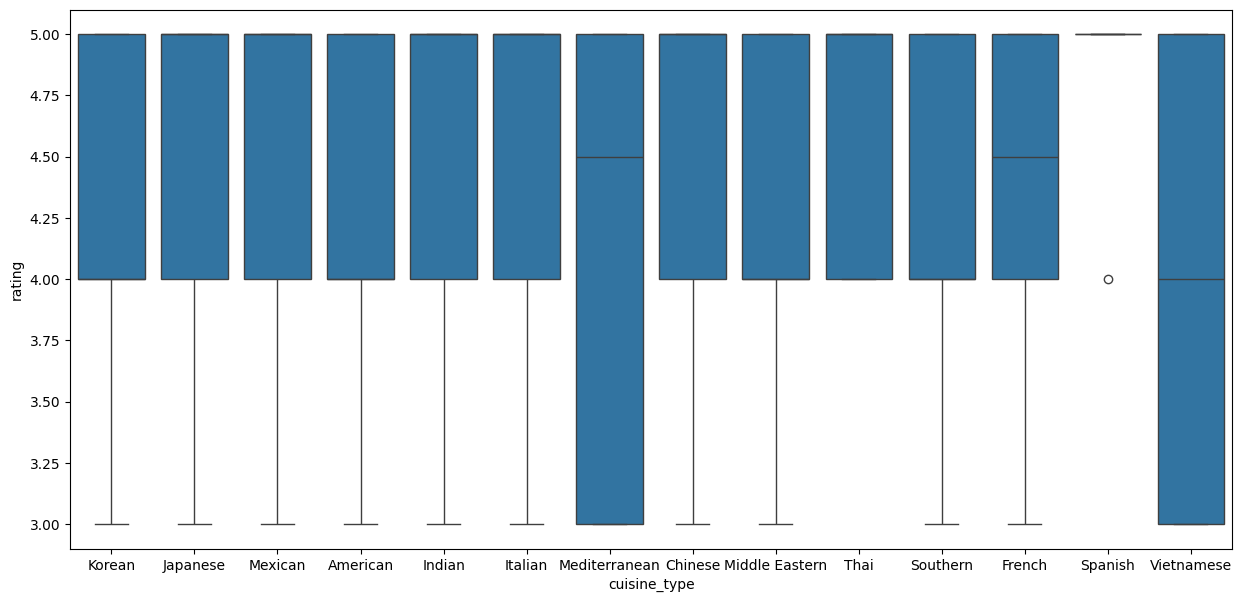

In [44]:
plt.figure(figsize=(15,7));
sns.boxplot(x = "cuisine_type", y = "rating", data = data);
plt.show();

### Observation
Mediterranean and Vietnamese have ratings ranging between 3 to 5. remaining cuisines are ranging from 4 to 5 for the orders.

### No Ratings Analysis
The following few set of code segments to analyze the orders which do not have ratings available. 

In [45]:
#create dataframe with no rating provided
data_no_rating = data[data['rating'].isna()].copy()
print(data_no_rating.shape[0])
data_no_rating.head()
#find the cuisine types that have number of records with no data provided
data_no_rating.groupby(['cuisine_type'])['cuisine_type'].value_counts()


736


cuisine_type
American          216
Chinese            82
French              8
Indian             23
Italian           126
Japanese          197
Korean              4
Mediterranean      14
Mexican            29
Middle Eastern     15
Southern            4
Spanish             6
Thai               10
Vietnamese          2
Name: count, dtype: int64

In [46]:
data_no_rating.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30


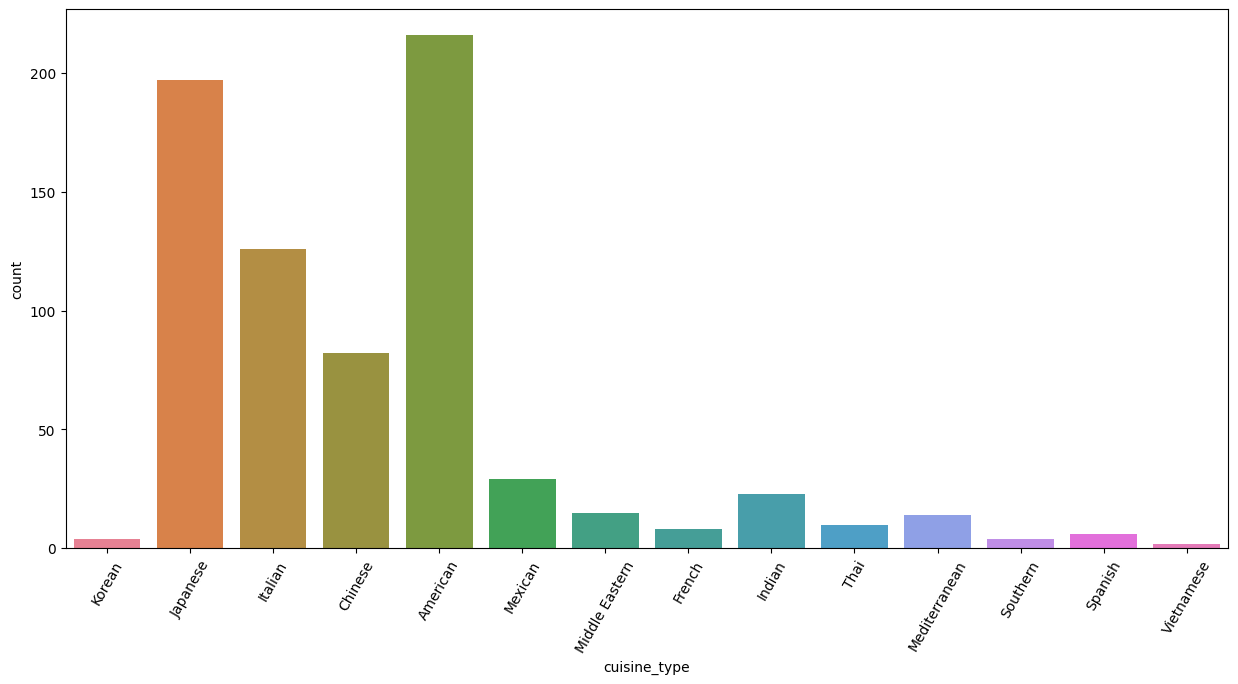

In [47]:
plt.figure(figsize=(15,7));
sns.countplot(data=data_no_rating, x='cuisine_type', hue='cuisine_type')
plt.xticks(rotation = 60);


### Observation
The American,Japaneese, Italian and Chineese have higher number of orders with no rating.

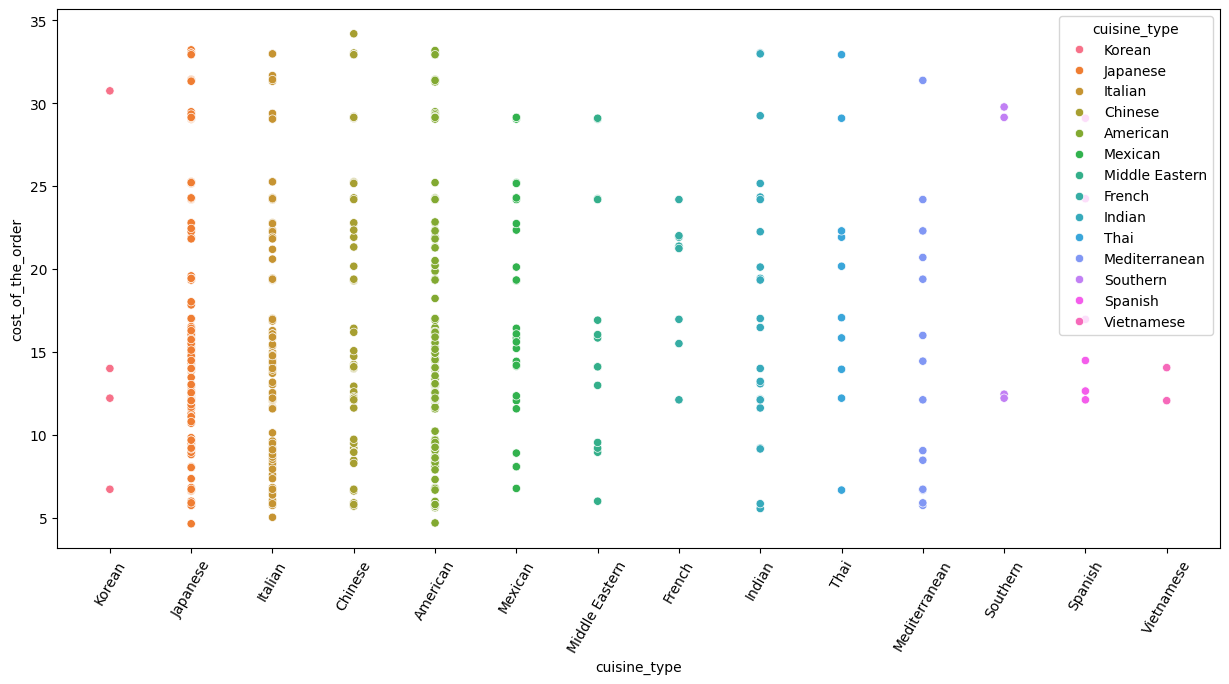

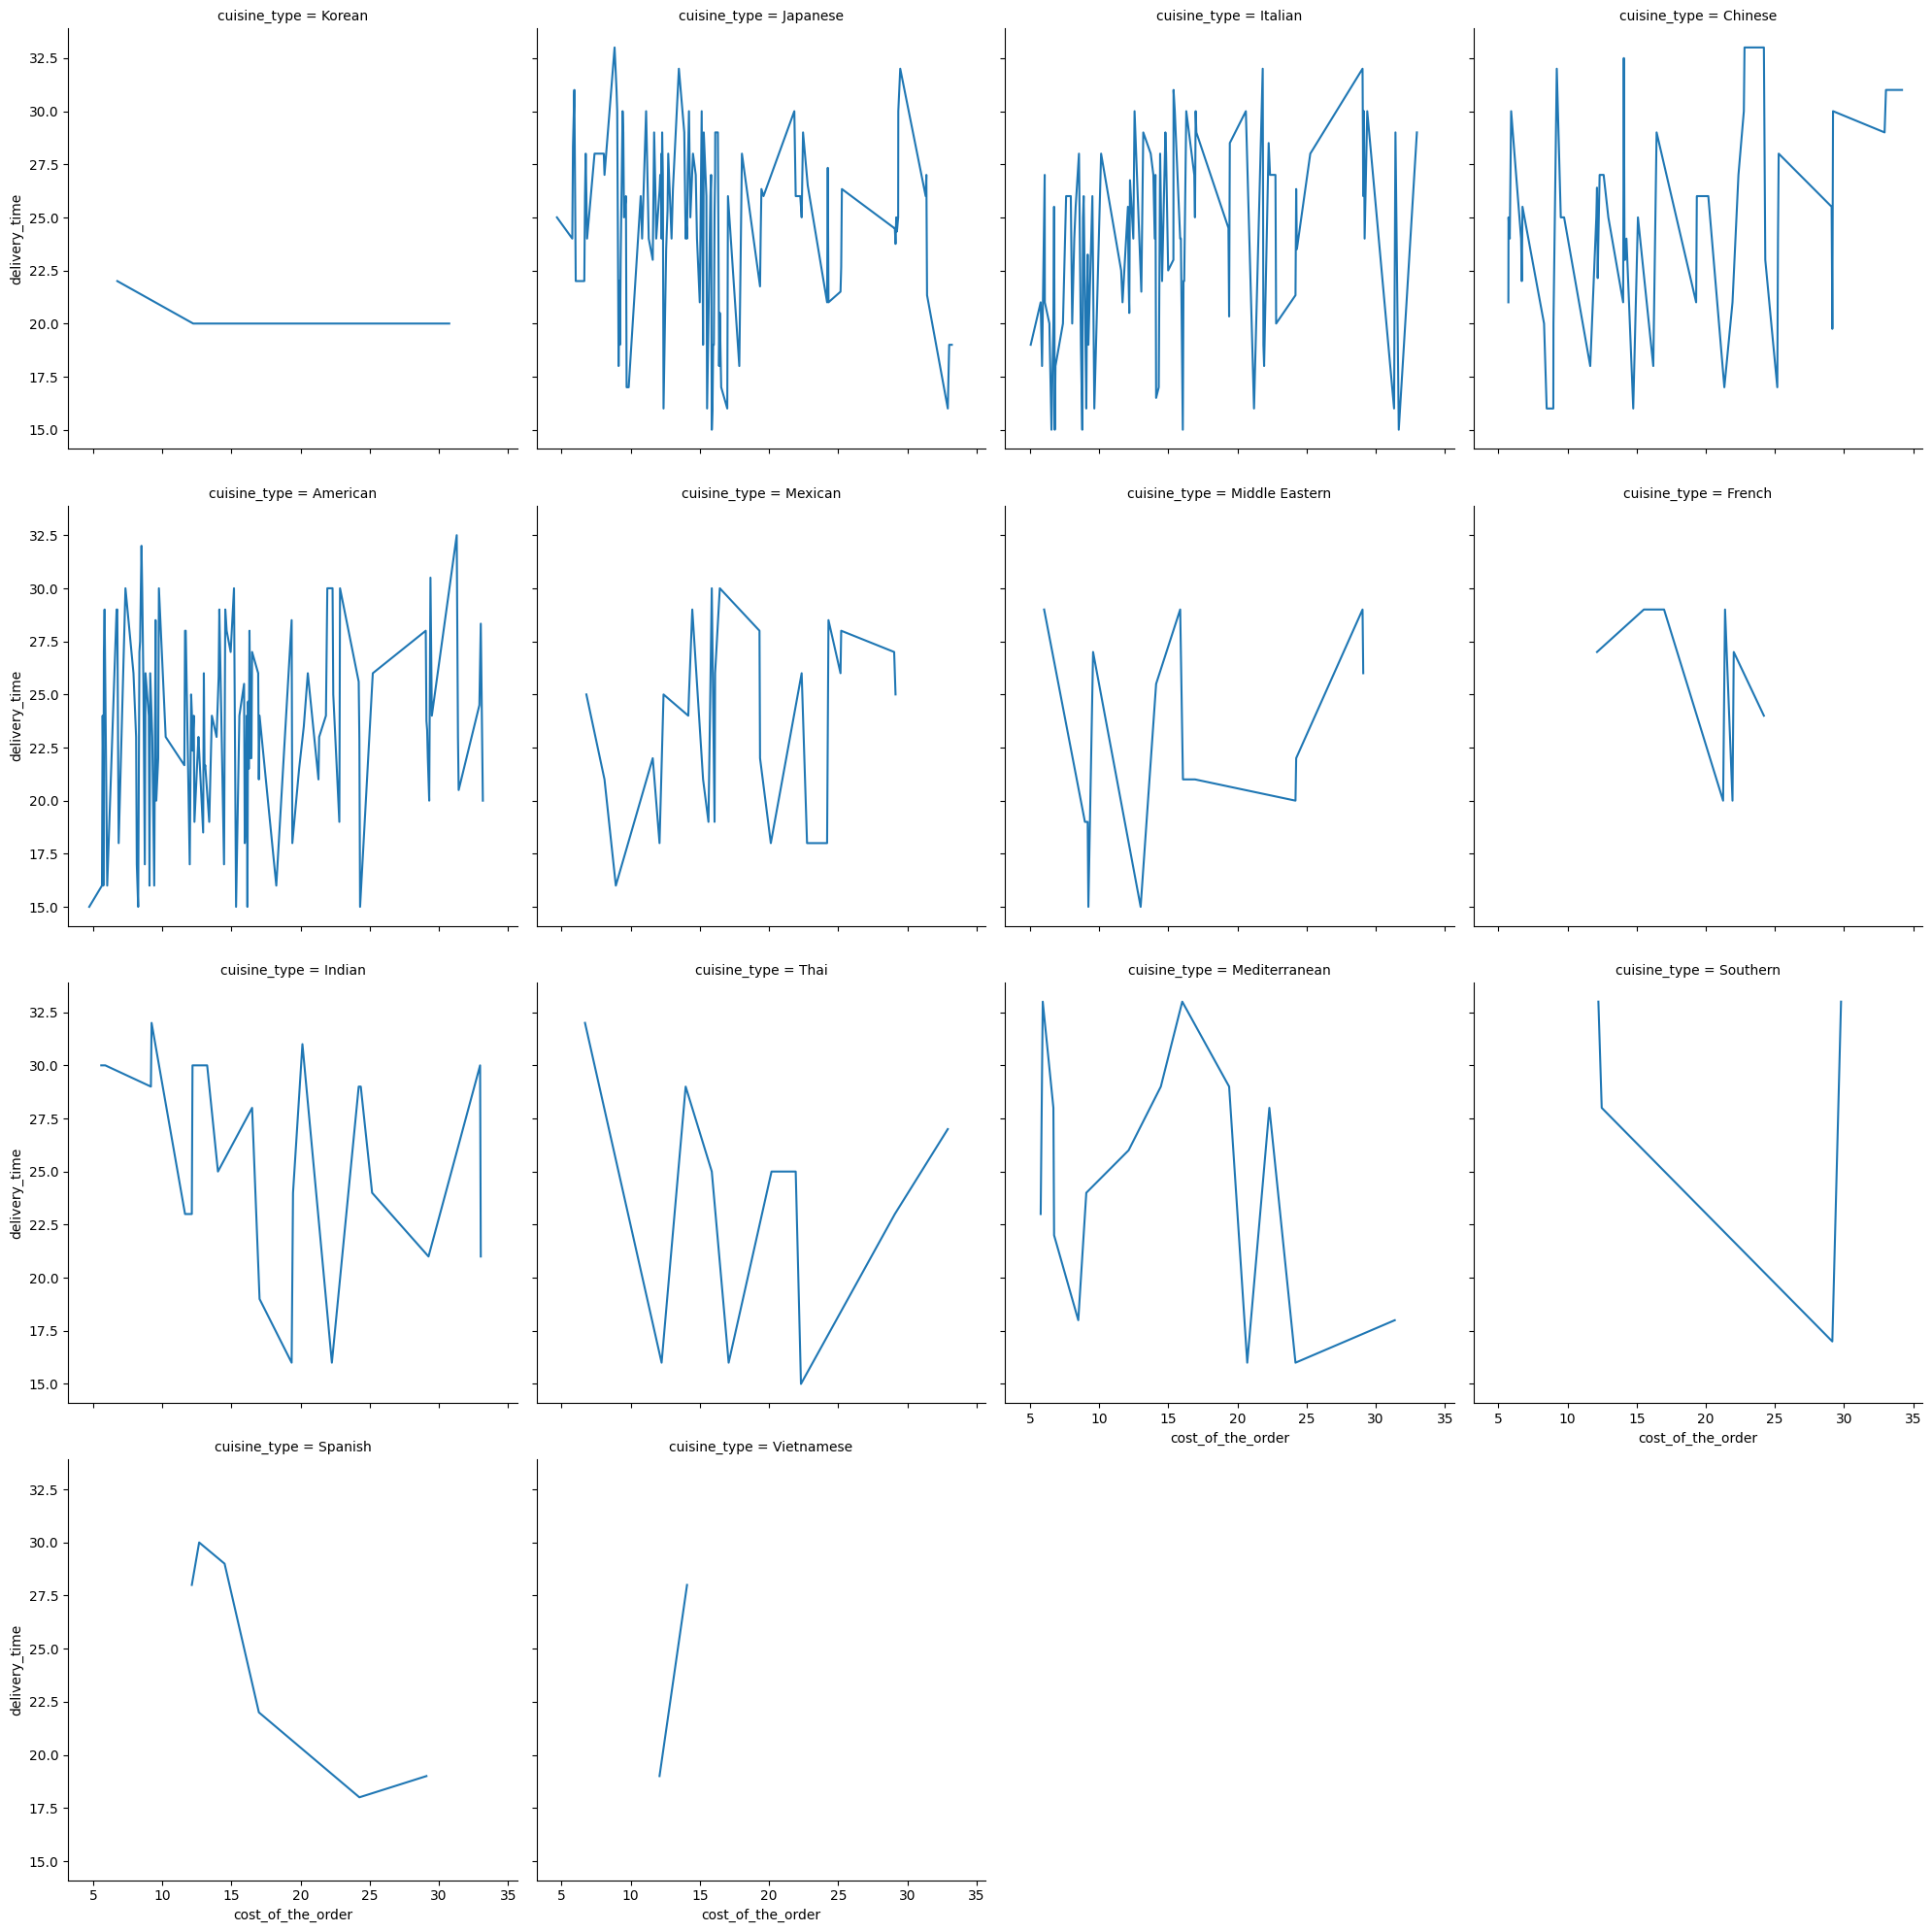

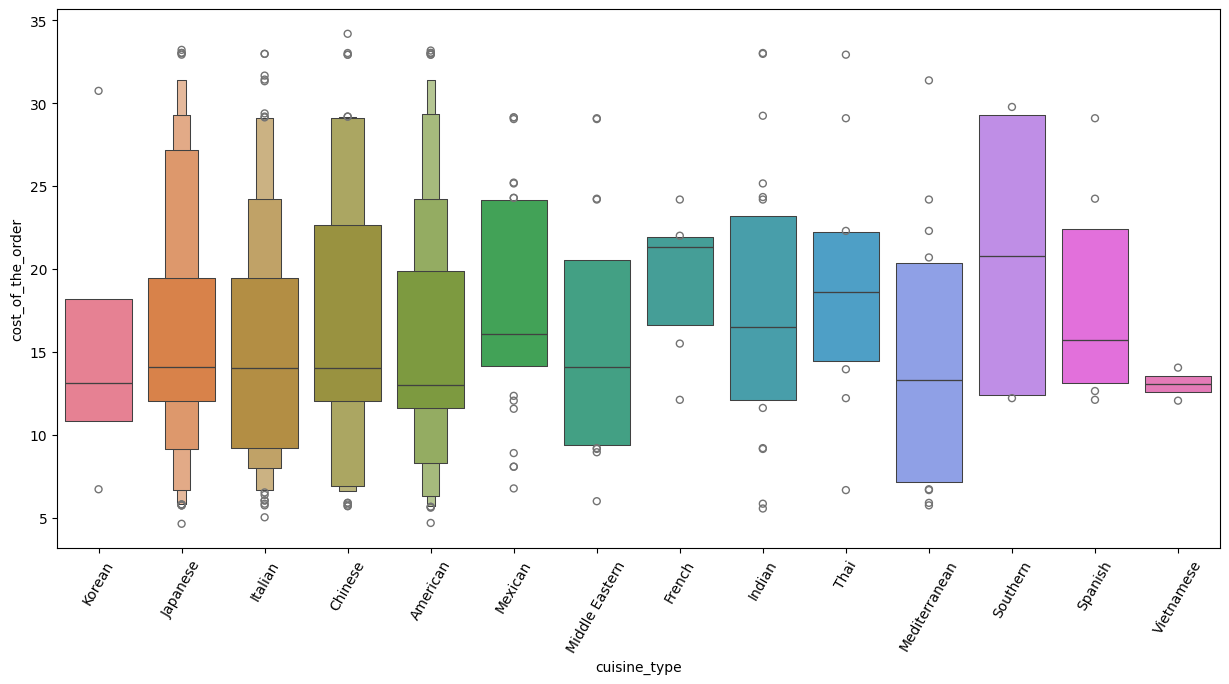

In [48]:
#plotting the scatterplot and replot with dataframe with no ratings to analyze the pattern
plt.figure(figsize=(15,7));
sns.scatterplot(data=data_no_rating, x='cuisine_type',y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation = 60);
sns.relplot(data=data_no_rating, y='delivery_time',x='cost_of_the_order', col='cuisine_type', kind='line', errorbar=None, col_wrap=4)
plt.show()
plt.figure(figsize=(15,7));
sns.boxenplot(data=data_no_rating, x='cuisine_type',y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation = 60);

### Observation
There is no correlation for ratings with cost of the order. All cuisine types have various cost of orders for not receiving the ratings.

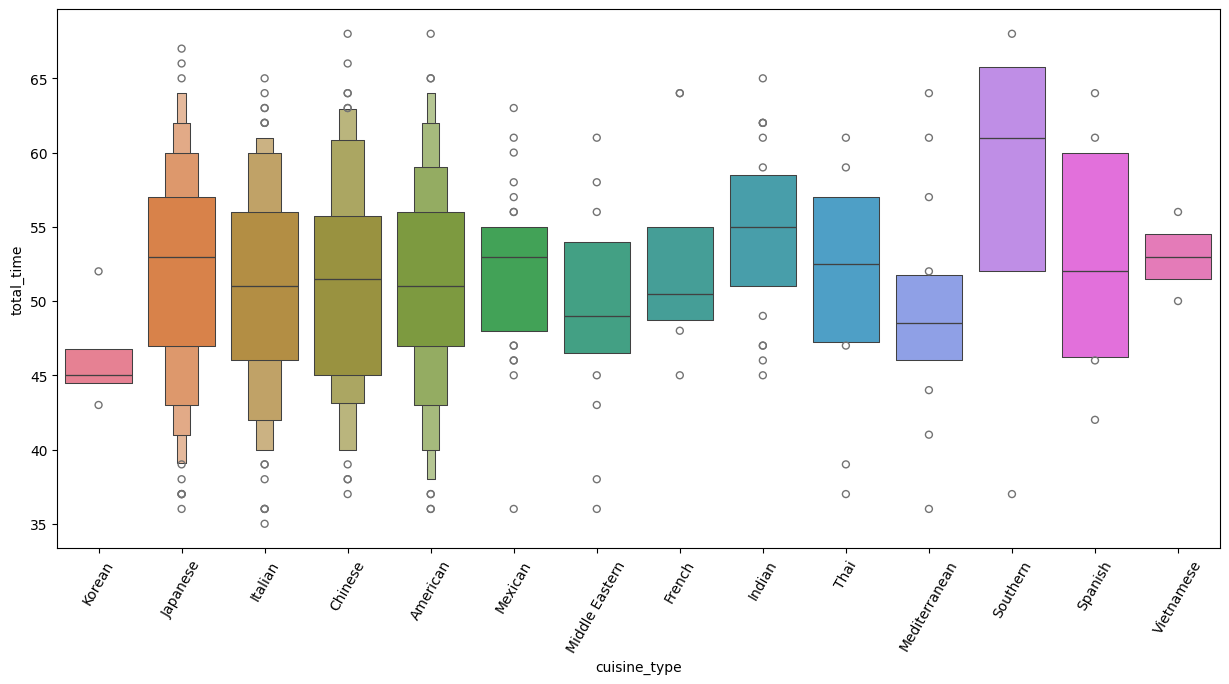

In [49]:
data_no_rating['total_time'] = data_no_rating['delivery_time']+data['food_preparation_time'];
plt.figure(figsize=(15,7));
sns.boxenplot(data=data_no_rating, x='cuisine_type',y='total_time', hue='cuisine_type')
plt.xticks(rotation = 60);

### Observation
Majority of cuisines have no rating are with higher total time(Food Preperation and Delivery time).

### Multiple Datapoint correlation

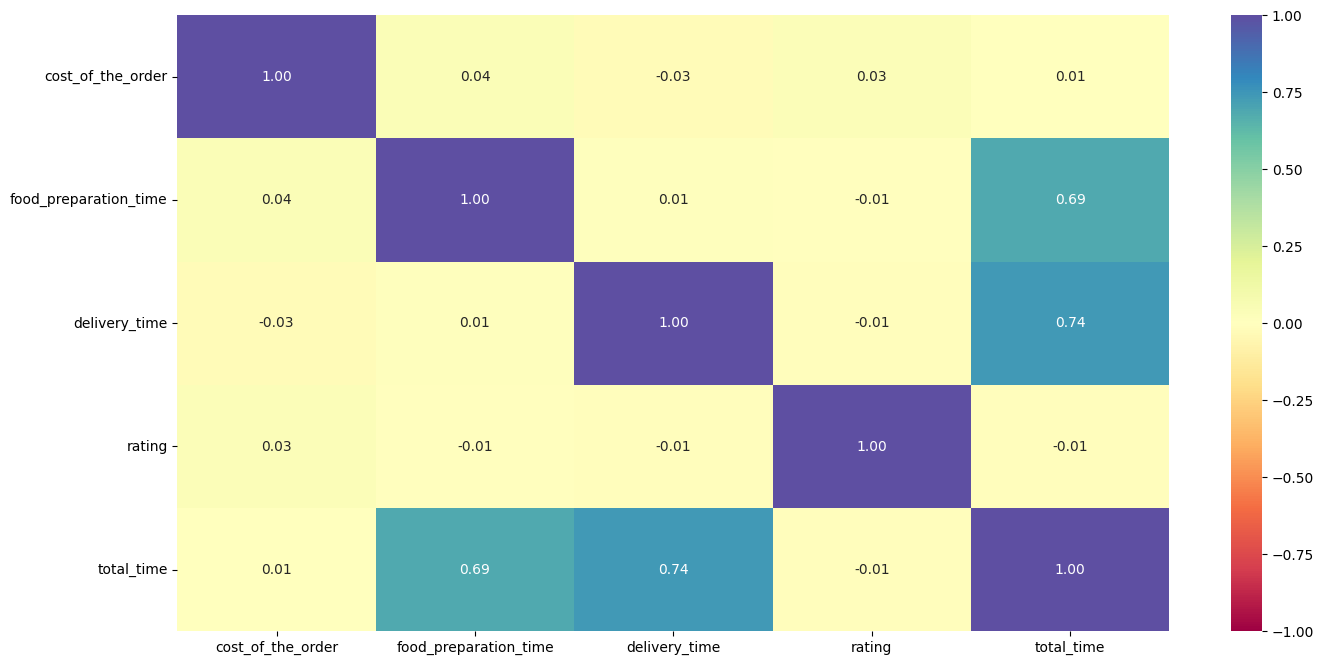

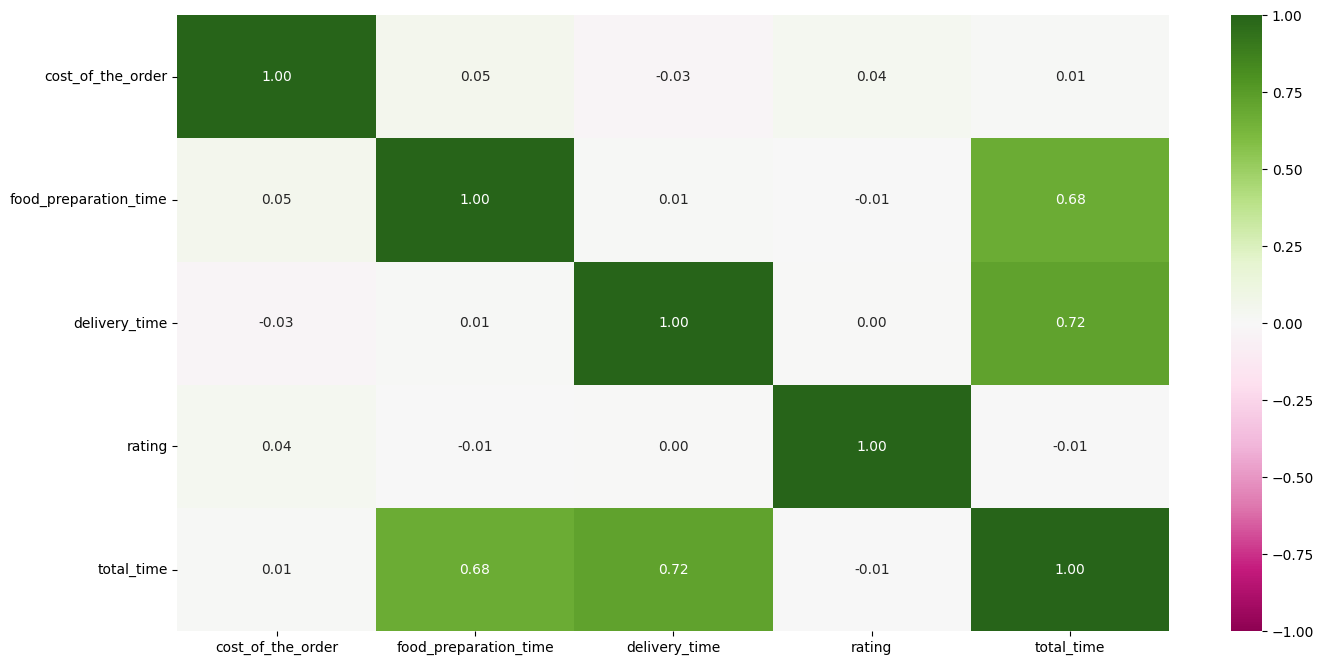

In [50]:
#creating a list for columns to be analyzed, Total time is calculated using Food Preperation time and Delivery Time
data['total_time'] = data['food_preparation_time']+data['delivery_time'];
data_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating','total_time']
plt.figure(figsize=(16, 8))
sns.heatmap(data[data_list].corr('pearson'),vmin=-1, vmax=1, fmt=".2f", annot=True,  cmap="Spectral")
plt.show()
plt.figure(figsize=(16, 8))
sns.heatmap(data[data_list].corr('spearman'),vmin=-1, vmax=1, fmt=".2f", annot=True,  cmap="PiYG")
plt.show()

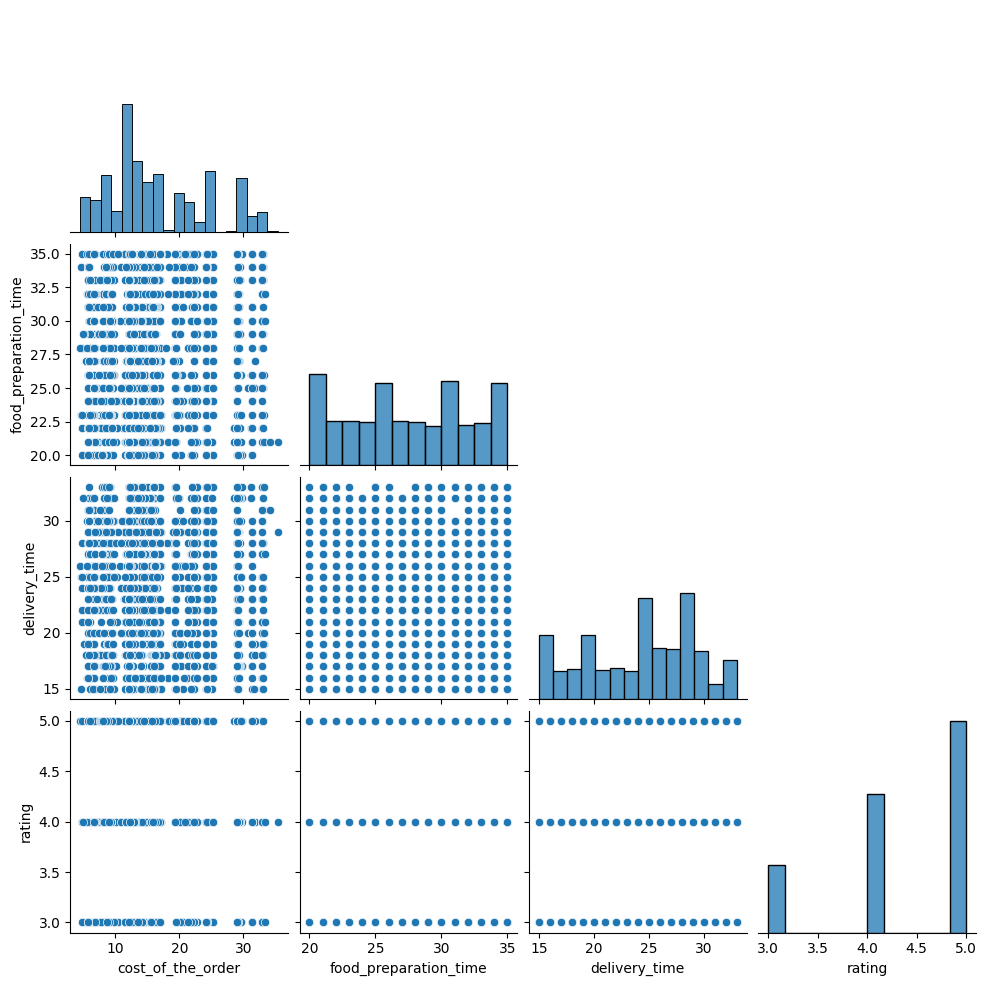

In [51]:
sns.pairplot(data=data, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating'], corner=True);

### Observation
* The total time(Delivery and Food Preperation time) have negative correlation with rating. The higher the total time the ratings were not recorded by customers or provided.
* There is a positive correlation between Cost of the order and Food Preperation time. The higher costs have tend to take longer food preperation times. 
* There is a weak negative correlation between Delivery Time and Cost of the order, the higher cost orders are delivering slow due to many items to delivered. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [52]:
# Filter the restaurants which has ratings
data_rated = data[data['rating'].notnull()].copy()

# Convert rating column from object to integer
data_rated['rating'] = data_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
data_rating_count = data_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# Get the restaurant names that have rating count more than 50
rest_names = data_rating_count[data_rating_count['rating']> 50]['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
data_mean_4 = data_rated[data_rated['restaurant_name'].isin(rest_names)].copy()

# Grouping the restaurants and calculate the mean
data_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### Observation -Q13
4 restaurants qualified for promotional offer. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [66]:
# Calculate the revenue based on the dollar amount
def rest_company_revenue(orderCost):
    if orderCost > 20:
        return orderCost*0.25
    if orderCost > 5:
        return orderCost*0.15
    else:
        return orderCost*0
#Calculate Revenue by applying the above function with cost of the order    
data['Revenue'] = data['cost_of_the_order'].map(rest_company_revenue)
data['Revenue'].sum();
#The total amount of revenue round upto 2 decimals
print('Total revenue is ',round(data['Revenue'].sum(),2),'dollars')
#Printing the top 5 revenue generated restaurants
data.sort_values(by='Revenue', ascending=False).reset_index().head(5)

Total revenue is  6166.3 dollars


,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,Revenue
0,573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4.0,21,29,50,8.8525
1,1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,NaN,21,31,52,8.5475
2,1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3.0,30,27,57,8.3425
3,1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4.0,32,21,53,8.3425
4,1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4.0,21,33,54,8.3300


#### Observations:
The total revenue is 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [54]:
# Write the code here
data['total_time'] = data['food_preparation_time']+data['delivery_time'];
data_deltime_gt_60 = data[data['total_time'] > 60]
print('Total number of orders greater than 60 is' , data_deltime_gt_60.shape[0]);
data_pct = data_deltime_gt_60.shape[0]/data.shape[0]*100;
print('Percentage of orders took more than 60 minutes are ',round(data_pct,2), '%');


Total number of orders greater than 60 is 200
Percentage of orders took more than 60 minutes are  10.54 %


#### Observations:
Total number of orders greater than 60 is 200
Percentage of orders took more than 60 minutes are  10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [55]:
# Write the code here
#weekday mean delivery time 
weekday_mean = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekday_mean = round(weekday_mean)
print('Weekday mean is ',weekday_mean)

#weekend mean delivery time
weekend_mean = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
weekend_mean = round(weekend_mean)
print('weekend mean is ',weekend_mean)

Weekday mean is  28
weekend mean is  22


#### Observations:
The mean delivery time during the weekday is 6 minutes higher than weekend. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## Conclusions:
#### Customer Preferences and Popular restaurants
* The analysis revealed that American, Japanese, and Italian cuisines were among the most preferred by customers
* Overall 736 have no ratings. American, Italian, Chineese have majority of the orders have no ratings recorded or received. Also they have the highest total time(Delivery and Food Preperation time) (Ref: Q7)
* Weekday has more delivery time than weekend.

### Delivery and order stats
* Nearly 30% of orders are over $20.
* Delivery time is higher in weekdays than weekend. 

#### Customer Engagement and Ratings
* Approximately 736 orders(38.8%) lacked customer ratings. A potentional opportunity area for improvement on prompting the user to submit a review for exchange of a coupon for future orders, that will help to accelerate the appropriate feedback and improve the efficiency and quality of the orders.(Ref Q5)
* Another positive aspect is, majority of orders are rated over 4.0, indicating overall customer satisfaction. (Ref Q6)

## Recommendations:
#### Marketing Stratergies

* By using the stratergies employed by top performing restaurants and use the similar marketing stratergies in other restaurants as well to improve the orders and delivery.
* Weekday total time(Food Preperation and Delivery Time) is higher than weekend. Hiring more delivery crews on weekday during the busy order times.

#### Restaurant/Cuisine Partnerships with Delivery Services
* As per the dataset, there are 3 restaurants which have higher number of orders such as Shake Shack, The Meatball Shop and Blue Ribbon Sush. Setting up the restaurant partnerships with the similar cuisine types to improve the quality of the food, service and sales. 
* Restaurants can partner with more delivery services to reach more customer base. 
* Restaurants can provide a web portal order options for Pickup and additional pricing benefits for Pickup orders.

### Feedback loop and Improvements
* Encourage customers to submit the ratings and also receive feedback on each individual menu item in order to identify the low rated areas and improve the overall food quality.Continue the feedback chanin regularly.
* Provide rewards to customers for successful reviews to identify the areas of improvements.

### Rewards or Loyality Program and Discount Stratergies
* Setup a unitified order platform and reward program. So frequent or not frequent users can get targeted emails to invite them to order the food.
* Easy redeemption options and discounts or Limited time promotions on new or revised items to entice customers to order them to try out.

### Delivery and Food Prep Optimization
* Food Preperation and Delivery time are total time to deliver the items to customer. 
* Implement effective way to reduce the food delivery time thus reducing the total time.
* Effective routing stratergy to reduce the delivery time and cluster the orders based on area and route.

---